### Score: 37

Q1.[13+19+5]

Bonus.[0]

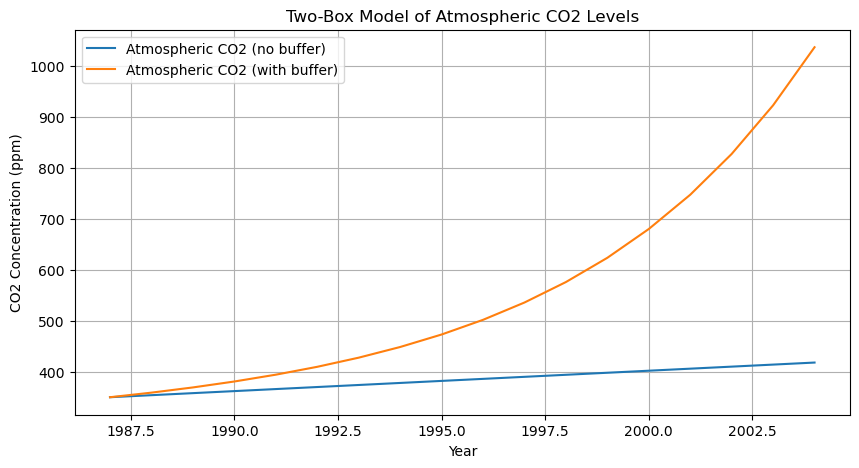

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
F_in = 6.0  # Input flux (GtC/year)
F_out = 2.0  # Output flux (GtC/year)
# NOTE: 请使用课程网页所提供的链接内的数据 -1
C_a_0 = 350.0  # Initial CO2 concentration in atmosphere (ppm)
C_l_0 = 300.0  # Initial CO2 concentration in land/ocean (ppm)
k = 0.1  # Buffer effect constant
dt = 1.0  # Time step (year)
years = np.arange(1987, 2005)  # Time range

# Initialize arrays to store results
C_a_no_buffer = np.zeros(len(years))
C_l_no_buffer = np.zeros(len(years))
C_a_with_buffer = np.zeros(len(years))
C_l_with_buffer = np.zeros(len(years))

C_a_no_buffer[0] = C_a_0
C_l_no_buffer[0] = C_l_0
C_a_with_buffer[0] = C_a_0
C_l_with_buffer[0] = C_l_0

# NOTE: 请参考文献内的公式计算二氧化碳浓度 -2
# Euler's method for no buffer effect
for i in range(1, len(years)):
    dC_a_dt = F_in - F_out
    dC_l_dt = F_out
    C_a_no_buffer[i] = C_a_no_buffer[i-1] + dC_a_dt * dt
    C_l_no_buffer[i] = C_l_no_buffer[i-1] + dC_l_dt * dt

# Euler's method for with buffer effect
for i in range(1, len(years)):
    dC_a_dt = F_in - F_out + k * (C_a_with_buffer[i-1] - C_l_with_buffer[i-1])
    dC_l_dt = F_out - k * (C_a_with_buffer[i-1] - C_l_with_buffer[i-1])
    C_a_with_buffer[i] = C_a_with_buffer[i-1] + dC_a_dt * dt
    C_l_with_buffer[i] = C_l_with_buffer[i-1] + dC_l_dt * dt

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(years, C_a_no_buffer, label='Atmospheric CO2 (no buffer)')
plt.plot(years, C_a_with_buffer, label='Atmospheric CO2 (with buffer)')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('Two-Box Model of Atmospheric CO2 Levels')
plt.legend()
plt.grid(True)
plt.show()

# Save the results for further analysis
np.savez('co2_levels.npz', years=years, C_a_no_buffer=C_a_no_buffer, C_a_with_buffer=C_a_with_buffer)